# Simple aggregation example

Download some ERA5 2m temperature data and calculate the daily mean, min and max

In [1]:
import cads_toolbox as ct
import matplotlib.pyplot as plt
ct.config.USE_CACHE=True

In [2]:
Data = ct.catalogue.retrieve(
    "reanalysis-era5-single-levels", {
        'variable': '2m_temperature',
        'product_type': 'reanalysis',
        'year': '2022',
        'month': '10',
        'day': [f'{dy:02d}' for dy in range(1,32)],
        'time': [f'{hr:02d}:00' for hr in range(24)],
        'grid': '3/3'
    }
)
Data

In [6]:
daily_mean = ct.analysis.aggregate.daily_mean(Data).assign_attrs({'long_name': 'Daily mean temperature'})
daily_min = ct.analysis.aggregate.daily_min(Data).assign_attrs({'long_name': 'Daily minimum temperature'})
daily_max = ct.analysis.aggregate.daily_max(Data).assign_attrs({'long_name': 'Daily maximum temperature'})

daily_mean

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 61, longitude: 120,
                time: 31)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 90.0 87.0 84.0 81.0 ... -84.0 -87.0 -90.0
  * longitude  (longitude) float64 0.0 3.0 6.0 9.0 ... 348.0 351.0 354.0 357.0
  * time       (time) datetime64[ns] 2022-10-01 2022-10-02 ... 2022-10-31
Data variables:
    t2m        (time, number, step, surface, latitude, longitude) float32 265...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-12-09T11:09 GRIB to CDM+CF via cfgrib-0.9.1...
    long_name:               Daily mean temperature

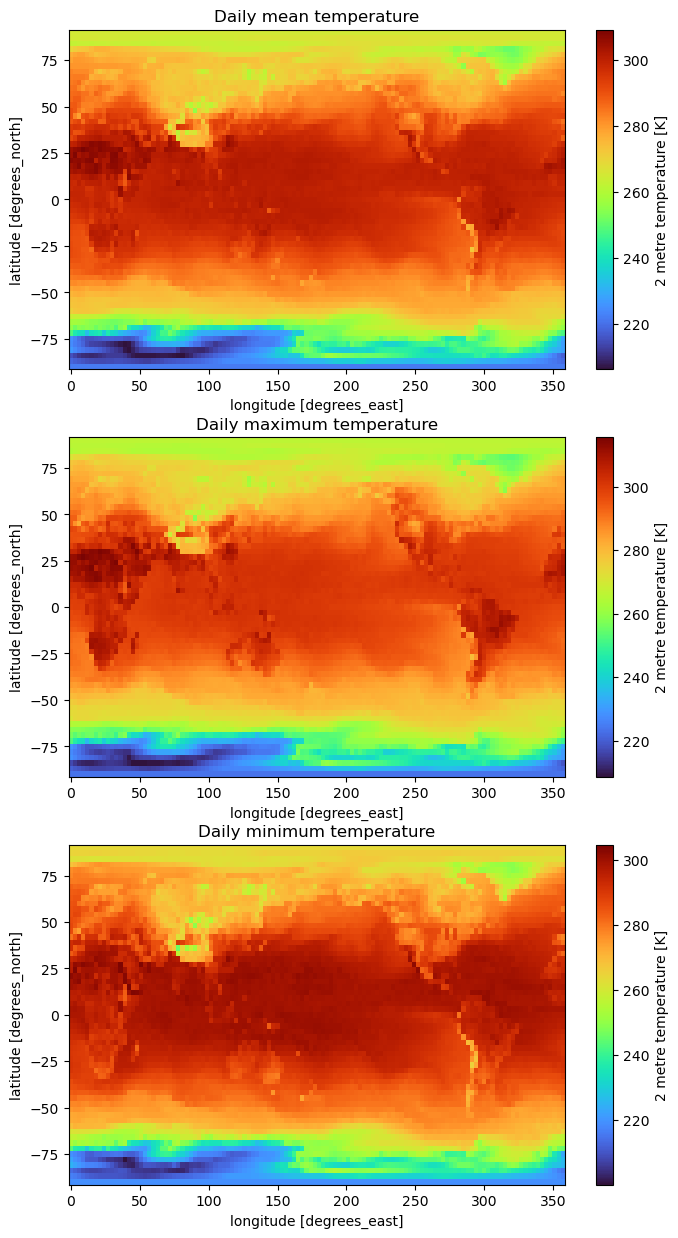

In [13]:
plot_date = '2022-10-01'
fig, axes = plt.subplots(3,1, figsize=(8,15))
for i, data in enumerate([daily_mean, daily_max, daily_min]):
    day_data = data.sel(time=plot_date)
    day_data.t2m.plot(ax=axes[i], cmap='turbo')
    axes[i].set_title(data.attrs.get('long_name'))
    axes[i].xaxis.set_title('Longitude')
    axes[i].xaxis.set_title('Latitude')
